In [ ]:
# Nilesh Kale (AI3005)
import pandas as pd
import zipfile
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Download the zip file from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)
# Step 2: Extract the file from the zip archive
with zipfile.ZipFile(BytesIO(response.content)) as z:
    with z.open('SMSSpamCollection') as file:
        df = pd.read_csv(file, sep='\t', header=None, names=['Label','Message'])


# Step 3: Check the dataset
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Define the file path
file_path = r"C:/Users/nilesh/Downloads/SMSSpamCollection"
# Read the file into a DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=['Label', 'Message'])

In [ ]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Convert labels to binary
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Label'],test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)
# Transform the test data
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
# Train the model
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Predict the labels for the test set
y_pred = nb_classifier.predict(X_test_vec)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.972488038277512
Confusion Matrix:
 [[1447    1]
 [  45  179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



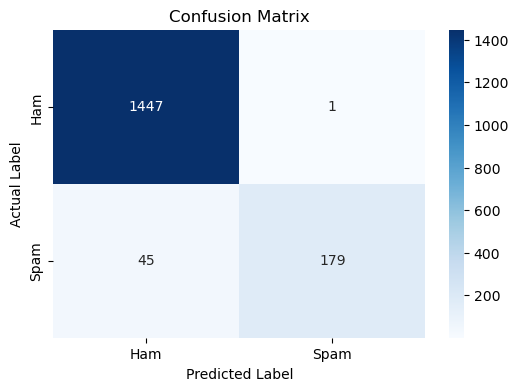

In [ ]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'],yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

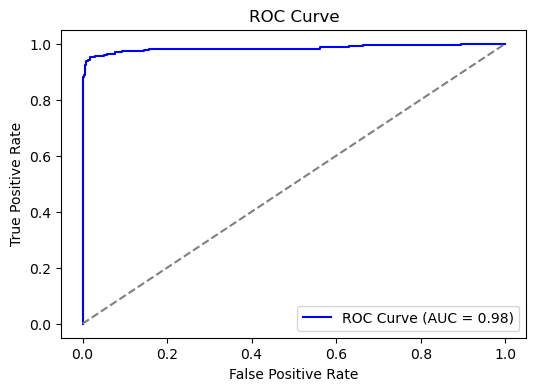

In [ ]:
# Get the predicted probabilities for class 1 (Spam)
y_probs = nb_classifier.predict_proba(X_test_vec)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Example input message
new_message = ["Congratulations! You've won a $1,000 gift card. Click here toclaim."]
# Preprocess and vectorize the input message
new_message_vec = vectorizer.transform(new_message)
# Predict the label
predicted_label = nb_classifier.predict(new_message_vec)
print(predicted_label)
# Map the predicted label to a readable format
label_mapping = {0: 'Ham', 1: 'Spam'}
print(f"Predicted Label: {label_mapping[predicted_label[0]]}")

[1]
Predicted Label: Spam


In [ ]:
# Example input message
new_message = ["Hey, are we still meeting for dinner tonight?"]
# Preprocess and vectorize the input message
new_message_vec = vectorizer.transform(new_message)
# Predict the label
predicted_label = nb_classifier.predict(new_message_vec)
print(predicted_label)
# Map the predicted label to a readable format
label_mapping = {0: 'Ham', 1: 'Spam'}
print(f"Predicted Label: {label_mapping[predicted_label[0]]}")

[0]
Predicted Label: Ham


In [ ]:
# Example input message
new_message = ["Your subscription has been renewed successfully. Thank you for your continued support."]
# Preprocess and vectorize the input message
new_message_vec = vectorizer.transform(new_message)
# Predict the label
predicted_label = nb_classifier.predict(new_message_vec)
print(predicted_label)
# Map the predicted label to a readable format
label_mapping = {0: 'Ham', 1: 'Spam'}
print(f"Predicted Label: {label_mapping[predicted_label[0]]}")

[0]
Predicted Label: Ham
